### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad (y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [139]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang",24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez", 25, 1.81),("Javier Araiz Miranda", 30, 1.80)]

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [141]:
# Creamos un array por cada dato que nos interesa
lista_nombres = np.array([tupla[0] for tupla in lista_alumnos])
lista_edades = np.array([tupla[1] for tupla in lista_alumnos])
lista_alturas = np.array([tupla[2] for tupla in lista_alumnos])

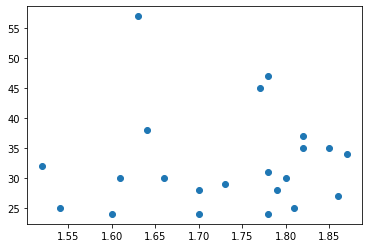

In [142]:
# Vemos la distribución de los datos
plt.scatter(x=lista_alturas, y=lista_edades)

In [143]:
# Establecemos la semilla que utilizaremos durante el ejercicio
seed = 0

In [144]:
# Creamos una instancia de la clase LinearRegression
lm = LinearRegression()

In [145]:
# Cambiamos los array de estructura para que no de problemas durante el entrenamiento del modelo
lista_edades = lista_edades.reshape(-1, 1)
lista_alturas = lista_alturas.reshape(-1, 1)

In [146]:
# Vamos a generar los conjuntos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(lista_alturas, lista_edades, test_size=0.2, random_state=seed)

In [147]:
# Vamos a utilizar la validación cruzada para hacer un primer estudio de los datos
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
array_cv = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
for i in range(len(array_cv)):
    print(f'R2 de la iteración {i +1} -> {array_cv[i]}')
print(f'Resultados de la validación cruzada: {array_cv.mean()} +- {array_cv.std()}')

R2 de la iteración 1 -> -16.351418214738196
R2 de la iteración 2 -> -0.39133607912082047
R2 de la iteración 3 -> -0.0029710706460388536
R2 de la iteración 4 -> -16.780315447216942
R2 de la iteración 5 -> -4.394974068223876
Resultados de la validación cruzada: -7.584202975989174 +- 7.494212968028158


Vemos que no solo la media del score de la validación cruzada es muy baja si no que ademas la variación es bastante considerable. Esto tiene sentido si consideramos la muestra tan pequeña y tan irregular que tenemos.

In [148]:
# Entrenamos nuestro modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
print(f'Score con el conjunto de entrenamiento: {lm.score(X_train, y_train)}')
print(f'Score con el conjunto de test: {lm.score(X_test, y_test)}')

Score con el conjunto de entrenamiento: 0.06720829203921108
Score con el conjunto de test: -0.4627934747224267


In [150]:
# Vamos a entrenar el modelo con todo el conjunto de datos
lm.fit(X=lista_alturas, y=lista_edades)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(225, 200, 'y = 2.9x + 27.48')

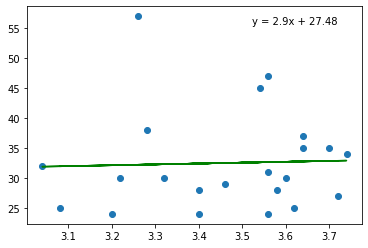

In [151]:
# Vamos a dibujar la recta de regresión y a sacar la ecuación
fig, ax = plt.subplots()
ax.scatter(x=lista_alturas * 2, y=lista_edades)
ax.plot(lista_alturas * 2, lm.predict(lista_alturas), c='green')
ax.annotate(f'y = {round(lm.coef_.item(), 2)}x + {round(lm.intercept_.item(), 2)}', xy= (225, 200), xycoords='axes points')

In [152]:
# Vamos a calcular los errores absolutos por separados y despues realizar un promedio para obtener el MAE
MAE = 0
for pos in range(len(lista_alturas)):
    error = abs(lm.predict(lista_alturas[pos].reshape(-1, 1)) - lista_edades[pos])
    MAE += error
    print(f'Error {pos + 1} -> {error.item()} años')
MAE /= len(lista_alturas)
print('-----')
print(f'Error total -> {MAE.item()} años')

Error 1 -> 2.296833773087073 años
Error 2 -> 1.0936675461741459 años
Error 3 -> 1.6451187335092357 años
Error 4 -> 8.122691292875992 años
Error 5 -> 4.674142480211081 años
Error 6 -> 5.877308707124008 años
Error 7 -> 6.948548812664914 años
Error 8 -> 2.1517150395778373 años
Error 9 -> 0.10949868073878122 años
Error 10 -> 4.238786279683374 años
Error 11 -> 12.38390501319261 años
Error 12 -> 4.412928759894463 años
Error 13 -> 8.645118733509236 años
Error 14 -> 24.790237467018464 años
Error 15 -> 3.5 años
Error 16 -> 2.1517150395778373 años
Error 17 -> 14.354881266490764 años
Error 18 -> 8.412928759894463 años
Error 19 -> 5.7612137203166185 años
Error 20 -> 2.2387862796833744 años
Error 21 -> 7.73218997361478 años
Error 22 -> 2.703166226912927 años
-----
Error total -> 6.102062844806909 años


In [153]:
# Vemos que la función mean_absolute_error() nos da el mismo valor que hemos obtenido
mean_absolute_error(lista_edades, lm.predict(lista_alturas))

6.102062844806909

In [154]:
# Vamos a calcular los errores al cuadrado por separados y despues realizar un promedio para obtener el MSE. Si le aplicamos la raiz cuadrada obtemos el RMSE
MSE = 0
for pos, elemen in enumerate(lista_alturas):
    error = (lm.predict(elemen.reshape(-1, 1)) - lista_edades[pos]) ** 2
    MSE += error
    print(f'Desviación al cuadrado {pos + 1} -> {error.item()} años')
MSE /= len(lista_alturas)
print('-----')
print(f'Desviación tipica -> {MSE.item()} años')
print('-----')
print(f'Varianza -> {MSE.item() ** (1/2)} años')

Desviación al cuadrado 1 -> 5.2754453811934 años
Desviación al cuadrado 2 -> 1.1961087015545775 años
Desviación al cuadrado 3 -> 2.7064156473430314 años
Desviación al cuadrado 4 -> 65.97811383936344 años
Desviación al cuadrado 5 -> 21.8476079253138 años
Desviación al cuadrado 6 -> 34.54275763883568 años
Desviación al cuadrado 7 -> 48.282330601986985 años
Desviación al cuadrado 8 -> 4.629877611545454 años
Desviación al cuadrado 9 -> 0.011989961083533536 años
Desviación al cuadrado 10 -> 17.96730912483202 años
Desviación al cuadrado 11 -> 153.36110337577705 años
Desviación al cuadrado 12 -> 19.473940239903683 años
Desviación al cuadrado 13 -> 74.73807791647234 años
Desviación al cuadrado 14 -> 614.5558736711661 años
Desviación al cuadrado 15 -> 12.25 años
Desviación al cuadrado 16 -> 4.629877611545454 años
Desviación al cuadrado 17 -> 206.06261617504748 años
Desviación al cuadrado 18 -> 70.77737031905939 años
Desviación al cuadrado 19 -> 33.191583531164454 años
Desviación al cuadrado 20 

Debido a que la distribución de edades no esta centrada sería mejor utilizar el RMSE

In [155]:
# Vemos que la función mean_squared_error() nos da los mismos valores que hemos obtenido
print(mean_squared_error(lista_edades, lm.predict(lista_alturas)))
print(mean_squared_error(lista_edades, lm.predict(lista_alturas)) ** (1/2))

66.52656512353082
8.156381864744368


Vamos a obtener la matriz de correlación. Para ello primero pasamos los datos a un dataframe 

In [156]:
df = pd.DataFrame([pd.Series(lista_alturas.flatten() ,name='Alturas'), pd.Series(lista_edades.flatten() ,name='Edades')])

In [157]:
df = df.T
df.index = lista_nombres

In [158]:
df

,Alturas,Edades
Clara Piniella,1.66,30.0
Daniel Walker,1.87,34.0
Leonardo Frazzetto,1.78,31.0
Xinru Yang,1.60,24.0
Jorge Garcia,1.79,28.0
Jonathan Suárez,1.86,27.0
Marina Serrano,1.54,25.0
Karina Inche,1.61,30.0
Mary Meza,1.52,32.0
Borja Puig,1.82,37.0


<AxesSubplot:>

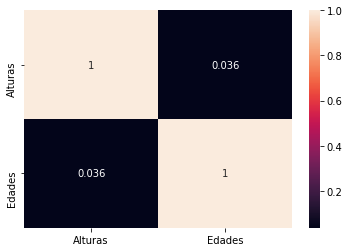

In [159]:
# Vemos que las columnas no estan correlacionadas
sns.heatmap(df.corr(), annot=True)

Vamos a ver que sucede si multiplicamos las alturas por dos. Entrenaremos el modelo con los nuevos datos y veremos como varía con la los datos inciales

In [160]:
lista_alturas = lista_alturas * 2

In [161]:
lm.fit(X=lista_alturas, y=lista_edades)
print(f'y = {round(lm.coef_.item(), 2)}x + {round(lm.intercept_.item(), 2)}')

y = 1.45x + 27.48


Vemos que la pendiente se ha reducido a la mitad que la del caso inicial y que la secante permanece igual.

Ahora haremos lo mismo pero doblando también las edades.

In [162]:
lista_edades = lista_edades * 2

In [163]:
lm.fit(X=lista_alturas, y=lista_edades)
print(print(f'y = {round(lm.coef_.item(), 2)}x + {round(lm.intercept_.item(), 2)}'))

y = 2.9x + 54.96
None


Parecía lógico pensar que al doblar tanto la altura como la edad nos quedaría un recta igual que el caso inicial pero desplazada hacia arriba. Queda demostrado viendo que la pendiente permanece igual mientras que la secante es el doble que el del caso inicial.